In [1]:
# Tensor Basics

import torch

x = torch.rand(2,2,2)
x

tensor([[[0.4955, 0.3885],
         [0.9609, 0.2982]],

        [[0.7603, 0.4584],
         [0.4031, 0.4334]]])

In [2]:
#zeros
xx = torch.zeros(3,3, dtype=torch.int)
xx

#ones = torch.ones

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [3]:
xx.dtype

torch.int32

In [4]:
#size
xx.size()

torch.Size([3, 3])

In [5]:
# using list in tensors
x = torch.tensor([4.5, 0.9])
x

tensor([4.5000, 0.9000])

In [6]:
x = torch.rand(2,2)
y = torch.rand(2,2)
z = x + y
c = torch.add(x,y)
print(x)
print(y)
print(z)
print(c)


tensor([[0.6584, 0.8033],
        [0.7095, 0.0634]])
tensor([[0.5352, 0.9000],
        [0.4289, 0.0633]])
tensor([[1.1936, 1.7033],
        [1.1385, 0.1267]])
tensor([[1.1936, 1.7033],
        [1.1385, 0.1267]])


In [7]:
# sub
c = torch.sub(x,y)
c

tensor([[ 1.2312e-01, -9.6701e-02],
        [ 2.8060e-01,  1.1653e-04]])

In [8]:
# mul
d = torch.mul(x,y)
d

tensor([[0.3524, 0.7230],
        [0.3043, 0.0040]])

In [9]:
y.mul_(x)

tensor([[0.3524, 0.7230],
        [0.3043, 0.0040]])

In [10]:
# div
f = torch.div(x,y)
f

tensor([[ 1.8683,  1.1111],
        [ 2.3314, 15.7961]])

In [11]:
# slicing
x = torch.rand(5,3)
print(x)
print(x[:,0])

tensor([[0.6173, 0.6756, 0.2815],
        [0.1124, 0.6523, 0.3367],
        [0.2045, 0.8280, 0.7030],
        [0.4342, 0.4095, 0.4542],
        [0.0798, 0.1416, 0.1696]])
tensor([0.6173, 0.1124, 0.2045, 0.4342, 0.0798])


In [12]:
# reshaping
x = torch.rand(4,4)
print(x)
y = x.view(16)
print(y)

tensor([[0.8670, 0.0463, 0.7613, 0.3825],
        [0.7688, 0.3683, 0.1480, 0.9635],
        [0.2621, 0.9134, 0.4856, 0.1630],
        [0.9640, 0.0265, 0.9761, 0.1613]])
tensor([0.8670, 0.0463, 0.7613, 0.3825, 0.7688, 0.3683, 0.1480, 0.9635, 0.2621,
        0.9134, 0.4856, 0.1630, 0.9640, 0.0265, 0.9761, 0.1613])


In [13]:
# convert from numpy to tensor and vice versa
import numpy as np

a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [14]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [15]:
a =  np.ones(5)
a

array([1., 1., 1., 1., 1.])

In [16]:
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

# Gradient Calculation with Autograd

In [17]:
x = torch.randn(3, requires_grad=True) #calculate the gradient with respect to X
x

tensor([ 0.1684,  0.8309, -0.3047], requires_grad=True)

In [18]:
y = x + 2
y

tensor([2.1684, 2.8309, 1.6953], grad_fn=<AddBackward0>)

In [23]:
z = y*y*2
z

tensor([ 9.4037, 16.0284,  5.7484], grad_fn=<MulBackward0>)

In [24]:
#z = z.mean()
z

tensor([ 9.4037, 16.0284,  5.7484], grad_fn=<MulBackward0>)

In [26]:
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) #dz/dx

In [27]:
x.grad

tensor([ 3.7585, 15.0983,  2.2672])

In [ ]:
# preventing pytorch from tracking the gradient functions history
#x.requires_grad_(False)
#x.detach()
#with torch.no_grad():

In [ ]:
x.requires_grad_(False)
x

tensor([ 0.1696,  0.4677, -0.7878])

In [ ]:
y = x.detach()
y

tensor([ 0.1696,  0.4677, -0.7878])

In [ ]:
with torch.no_grad():
    y = x + 2
    print(y)

tensor([2.1696, 2.4677, 1.2122])


In [28]:
y

tensor([2.1684, 2.8309, 1.6953], grad_fn=<AddBackward0>)

In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(2):
    model_output = (weights * 3).sum()

    model_output.backward()

    print(weights.grad)

    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Backpropagation

- Forward pass: Compute loss
- Compute local gradients
- Backward pass: Compute dLoss / dWeights using the chain rule

yhat = w * x

Loss = (yhat - y)^2 = (wx -y)^2

Forward pass: x = A, y=2, w=A

In [33]:
#code implementation
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

#forward pass and the loss
y_hat = w * x
loss = (y_hat - y)**2


tensor(1., grad_fn=<PowBackward0>)

In [34]:
# backward pass
loss.backward()
w.grad

tensor(-2.)

# Gradient Descent with AutoGrad

In [36]:
# f = w * x
# f = 2 * x

X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

# model prediction
def forward_pass(x):
    return w * x

# loss = MSE (Linear regression)
def loss (y, y_predicted):
    return ((y_predicted - y)**2).mean()


#gradient
#MSE  = 1/N * (w*x - y)**2
# dj/dw = 1/N 2x (w*x -y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()


print(f'Prediction before training: f(5)= {forward_pass(5):.3f}')

# training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward_pass(X)

    # loss
    l = loss(Y, y_pred)

    # gradients
    dw = gradient(X, Y, y_pred)

    #update weights
    w -= learning_rate * dw

    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w - {w:.3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5)= {forward_pass(5):.3f}')


Prediction before training: f(5)= 0.000
epoch 1: w - 1.200, loss = 30.00000000
epoch 2: w - 1.680, loss = 4.79999924
epoch 3: w - 1.872, loss = 0.76800019
epoch 4: w - 1.949, loss = 0.12288000
epoch 5: w - 1.980, loss = 0.01966083
epoch 6: w - 1.992, loss = 0.00314570
epoch 7: w - 1.997, loss = 0.00050332
epoch 8: w - 1.999, loss = 0.00008053
epoch 9: w - 1.999, loss = 0.00001288
epoch 10: w - 2.000, loss = 0.00000206
Prediction after training: f(5)= 9.999


In [38]:
# using pytorch

# f = w * x
# f = 2 * x

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward_pass(x):
    return w * x

# loss = MSE (Linear regression)
def loss (y, y_predicted):
    return ((y_predicted - y)**2).mean()



print(f'Prediction before training: f(5)= {forward_pass(5):.3f}')

# training
learning_rate = 0.01
n_iters = 1000

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward_pass(X)

    # loss
    l = loss(Y, y_pred)

    # gradients = backward pass
    l.backward() #dl/dw

    #update weights
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zero gradients
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w - {w:.3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5)= {forward_pass(5):.3f}')


Prediction before training: f(5)= 0.000
epoch 1: w - 0.300, loss = 30.00000000
epoch 11: w - 1.665, loss = 1.16278565
epoch 21: w - 1.934, loss = 0.04506890
epoch 31: w - 1.987, loss = 0.00174685
epoch 41: w - 1.997, loss = 0.00006770
epoch 51: w - 1.999, loss = 0.00000262
epoch 61: w - 2.000, loss = 0.00000010
epoch 71: w - 2.000, loss = 0.00000000
epoch 81: w - 2.000, loss = 0.00000000
epoch 91: w - 2.000, loss = 0.00000000
epoch 101: w - 2.000, loss = 0.00000000
epoch 111: w - 2.000, loss = 0.00000000
epoch 121: w - 2.000, loss = 0.00000000


epoch 131: w - 2.000, loss = 0.00000000
epoch 141: w - 2.000, loss = 0.00000000
epoch 151: w - 2.000, loss = 0.00000000
epoch 161: w - 2.000, loss = 0.00000000
epoch 171: w - 2.000, loss = 0.00000000
epoch 181: w - 2.000, loss = 0.00000000
epoch 191: w - 2.000, loss = 0.00000000
epoch 201: w - 2.000, loss = 0.00000000
epoch 211: w - 2.000, loss = 0.00000000
epoch 221: w - 2.000, loss = 0.00000000
epoch 231: w - 2.000, loss = 0.00000000
epoch 241: w - 2.000, loss = 0.00000000
epoch 251: w - 2.000, loss = 0.00000000
epoch 261: w - 2.000, loss = 0.00000000
epoch 271: w - 2.000, loss = 0.00000000
epoch 281: w - 2.000, loss = 0.00000000
epoch 291: w - 2.000, loss = 0.00000000
epoch 301: w - 2.000, loss = 0.00000000
epoch 311: w - 2.000, loss = 0.00000000
epoch 321: w - 2.000, loss = 0.00000000
epoch 331: w - 2.000, loss = 0.00000000
epoch 341: w - 2.000, loss = 0.00000000
epoch 351: w - 2.000, loss = 0.00000000
epoch 361: w - 2.000, loss = 0.00000000
epoch 371: w - 2.000, loss = 0.00000000


# Training Pipeline

- Design model (input, output size, forward pass)
- Construct loss and optimizer
- Training loop:
-- forward pass: compute prediction
-- backward pass: gradients
-- update weights

In [9]:
# using pytorch

# f = w * x
# f = 2 * x
import torch
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

n_samples, n_features = X.shape

print(n_samples, n_features)

input_size = n_features
output_size = n_features

#model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

X_test = torch.tensor([5], dtype=torch.float32)


print(f'Prediction before training: f(5)= {model(X_test).item():.3f}')

# training
learning_rate = 0.01
n_iters = 1000
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = model(X)

    # loss
    l = loss(Y, y_pred)

    # gradients = backward pass
    l.backward() #dl/dw

    #update weights
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if epoch % 20 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5)= {model(X_test).item():.3f}')


4 1
Prediction before training: f(5)= -0.416
epoch 1: w = 0.186, loss = 31.72766304
epoch 21: w = 1.697, loss = 0.12213358
epoch 41: w = 1.751, loss = 0.08957390
epoch 61: w = 1.766, loss = 0.07943748
epoch 81: w = 1.780, loss = 0.07045934
epoch 101: w = 1.793, loss = 0.06249586
epoch 121: w = 1.805, loss = 0.05543232
epoch 141: w = 1.816, loss = 0.04916724
epoch 161: w = 1.827, loss = 0.04361024
epoch 181: w = 1.837, loss = 0.03868131
epoch 201: w = 1.846, loss = 0.03430945
epoch 221: w = 1.855, loss = 0.03043175
epoch 241: w = 1.864, loss = 0.02699225
epoch 261: w = 1.872, loss = 0.02394151
epoch 281: w = 1.879, loss = 0.02123556
epoch 301: w = 1.886, loss = 0.01883546
epoch 321: w = 1.893, loss = 0.01670661
epoch 341: w = 1.899, loss = 0.01481842
epoch 361: w = 1.905, loss = 0.01314358
epoch 381: w = 1.910, loss = 0.01165805
epoch 401: w = 1.916, loss = 0.01034042
epoch 421: w = 1.921, loss = 0.00917174
epoch 441: w = 1.925, loss = 0.00813513
epoch 461: w = 1.930, loss = 0.00721566


# Linear Regression

In [12]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

Steps:

- prepare data
- model
- loss and optimizer
- training loop

epoch: 10, loss = 1628.7839
epoch: 20, loss = 1240.9712
epoch: 30, loss = 971.7648
epoch: 40, loss = 784.6990
epoch: 50, loss = 654.5821
epoch: 60, loss = 563.9911
epoch: 70, loss = 500.8616
epoch: 80, loss = 456.8307
epoch: 90, loss = 426.0947
epoch: 100, loss = 404.6224
epoch: 110, loss = 389.6102
epoch: 120, loss = 379.1071
epoch: 130, loss = 371.7537
epoch: 140, loss = 366.6020
epoch: 150, loss = 362.9906
epoch: 160, loss = 360.4575
epoch: 170, loss = 358.6799
epoch: 180, loss = 357.4316
epoch: 190, loss = 356.5548
epoch: 200, loss = 355.9384


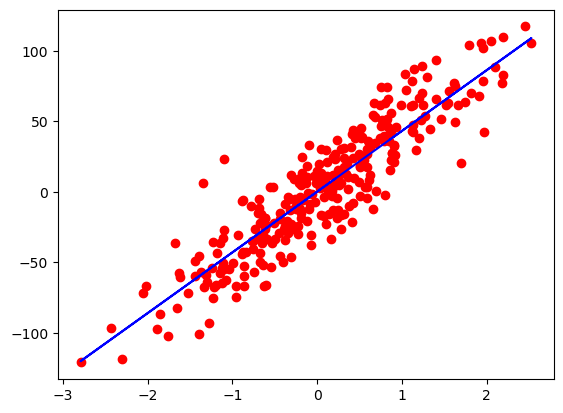

In [13]:
X_numpy, y_numpy = datasets.make_regression(n_samples=300, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1) #view is a pytorch method that does resampling

n_samples, n_features = X.shape

# model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epochs = 200
for epoch in range(num_epochs):

    # forward pass
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass
    loss.backward()

    #update
    optimizer.step()

    optimizer.zero_grad()

    if  (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


# plotting it
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')

plt.show()

# Logistic Regression

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# data
breast = datasets.load_breast_cancer()
X, y = breast.data, breast.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# model
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epochs = 200
for epoch in range(num_epochs):
    # forward pass
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # empty gradients
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss= {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_class = y_predicted.round()
    accuracy = y_predicted_class.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {accuracy:.4f}')


epoch: 10, loss= 0.4578
epoch: 20, loss= 0.4035
epoch: 30, loss= 0.3658
epoch: 40, loss= 0.3378
epoch: 50, loss= 0.3160
epoch: 60, loss= 0.2984
epoch: 70, loss= 0.2836
epoch: 80, loss= 0.2711
epoch: 90, loss= 0.2603
epoch: 100, loss= 0.2507
epoch: 110, loss= 0.2423
epoch: 120, loss= 0.2347
epoch: 130, loss= 0.2279
epoch: 140, loss= 0.2216
epoch: 150, loss= 0.2159
epoch: 160, loss= 0.2107
epoch: 170, loss= 0.2058
epoch: 180, loss= 0.2013
epoch: 190, loss= 0.1972
epoch: 200, loss= 0.1933
accuracy = 0.9825
